# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("balanced_spam_data.csv", encoding = "ISO-8859-1")

In [3]:
data.tail(n=10)

Unnamed: 0                                                sms labels
2978        2304              Don I ' t think he has spatula hands!    ham
2979        1002  Todays numbers Voda ending 7548 selected are t...   spam
2980         563  SMS AUCTION You have won a Nokia 7250i. This i...   spam
2981         962  Valentines Day Special! Win over Ã¥ 1000 Â£ in...   spam
2982        2070  No i ' m not gonna be able to. | | too late no...    ham
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

In [4]:
data.shape

(2988, 3)

# Data Cleaning

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [6]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

In [7]:
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop,inplace=True, axis=1)

In [8]:
data

sms labels
0     Good afternoon starshine! How's my boytoy? Doe...    ham
1     My sis is catching e show in e afternoon so i'...    ham
2                                What happened to date?    ham
3                              K:)k.are you in college?    ham
4                           S but mostly not like that.    ham
...                                                 ...    ...
2983  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986  Urgent UR awarded a complimentary trip to Euro...   spam
2987                               Where r we converge?    ham

[2988 rows x 2 columns]

In [9]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [10]:
data['sms'] = data['sms'].apply(clean_text)

In [11]:
data.shape

(2988, 2)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['labels'], test_size = 0.2, random_state = 2)

In [14]:
y_train.shape

(2390,)

In [15]:
X_test.shape

(598,)

In [16]:
x_test_list = X_test.tolist()
y_test_list = y_test.tolist()

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['sms'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

## Building KNN classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
import time
start_time = time.time()
neigh.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
y_pred = neigh.predict(X_test)

In [20]:
training_time

0.003215789794921875

In [21]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,

## Evaluation of the KNN  model

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9448160535117057


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       302
           1       1.00      0.89      0.94       296

    accuracy                           0.94       598
   macro avg       0.95      0.94      0.94       598
weighted avg       0.95      0.94      0.94       598



In [24]:
## Evaluation of the KNN model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 0.9448160535117057
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       302
           1       1.00      0.89      0.94       296

    accuracy                           0.94       598
   macro avg       0.95      0.94      0.94       598
weighted avg       0.95      0.94      0.94       598



## Visualizing evaluation metrics

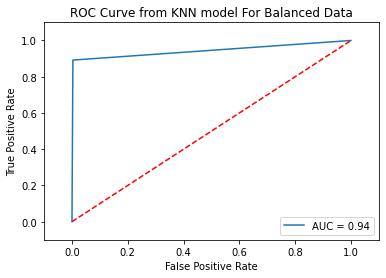

In [25]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve from KNN model For Balanced Data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/knn_roc_balanced.jpg')
plt.show()

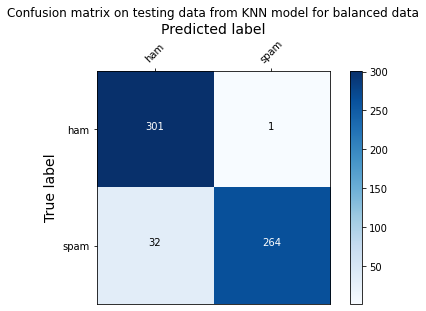

In [26]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.title("Confusion matrix on testing data from KNN model for balanced data")
plt.savefig('results/knn_confusion_matrix_balanced.jpg')
plt.show()


# Saving model

In [27]:
import pickle
pickle.dump(neigh, open("models/KNN_model_balanced", 'wb'))
 

## Adding KNN prediction to result_test_data.csv file

In [28]:
test_result_data = pd.read_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_balanced.csv")
knn_predictions = y_pred.tolist()
test_result_data['KNN prediction'] = knn_predictions
test_result_data.to_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_KNN_balanced.csv")

# Implement k fold cross validation



In [29]:
from sklearn.model_selection import KFold
import numpy as np


In [30]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(data['labels'])
X= data['sms']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


In [31]:
accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    
#     classifier = SVC()

#     classifier.fit(X_train,y_train)
#     y_pred = classifier.predict(X_test)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    
    print('\n')

[[147   0]
 [ 53  99]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       147
           1       1.00      0.65      0.79       152

    accuracy                           0.82       299
   macro avg       0.87      0.83      0.82       299
weighted avg       0.87      0.82      0.82       299

Accuracy in this fold is 0.822742474916388


[[142   0]
 [ 55 102]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       142
           1       1.00      0.65      0.79       157

    accuracy                           0.82       299
   macro avg       0.86      0.82      0.81       299
weighted avg       0.87      0.82      0.81       299

Accuracy in this fold is 0.8160535117056856


[[156   0]
 [ 51  92]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       156
           1       1.00      0.64      0.78       143

    accuracy          

In [32]:
accuracy_list = [i*100 for i in accuracy_list]

In [33]:
accuracy_list

[82.2742474916388,
 81.60535117056857,
 82.94314381270902,
 82.6086956521739,
 81.60535117056857,
 82.2742474916388,
 86.62207357859532,
 79.93311036789298,
 95.30201342281879,
 66.77852348993288]

In [34]:
fold_list = [1,2,3,4,5,6,7,8,9,10]

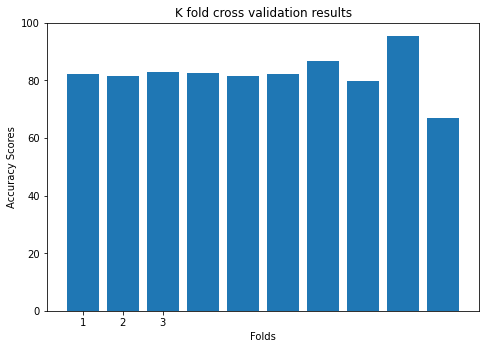

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([0,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 4, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results')
fig.savefig('results/k_fold_cross_validation_result_knn_balanced.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()
